1. Dataset Overview
--------------------------------------------------
Total Rows: 5110
Total Columns: 12

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

2. Missing Values Analys

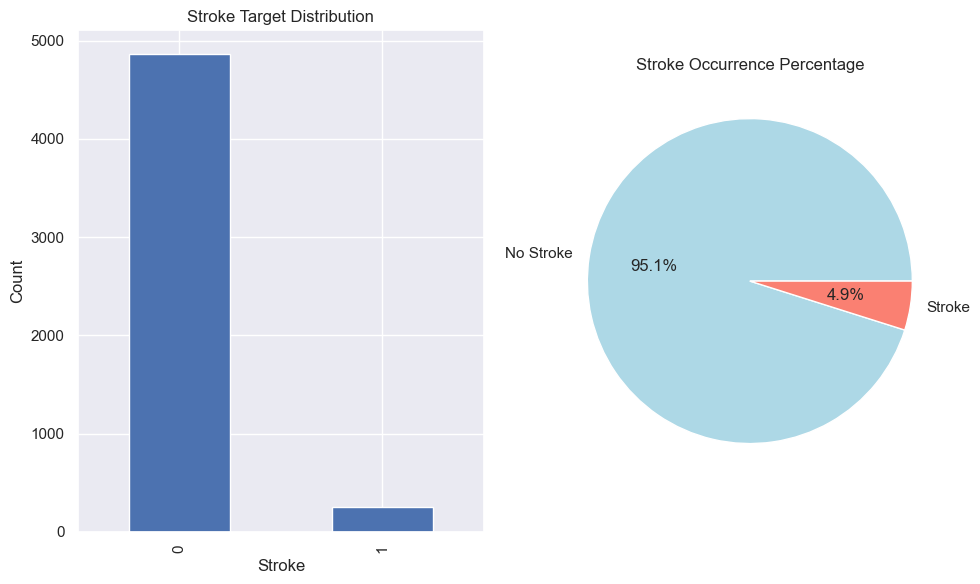

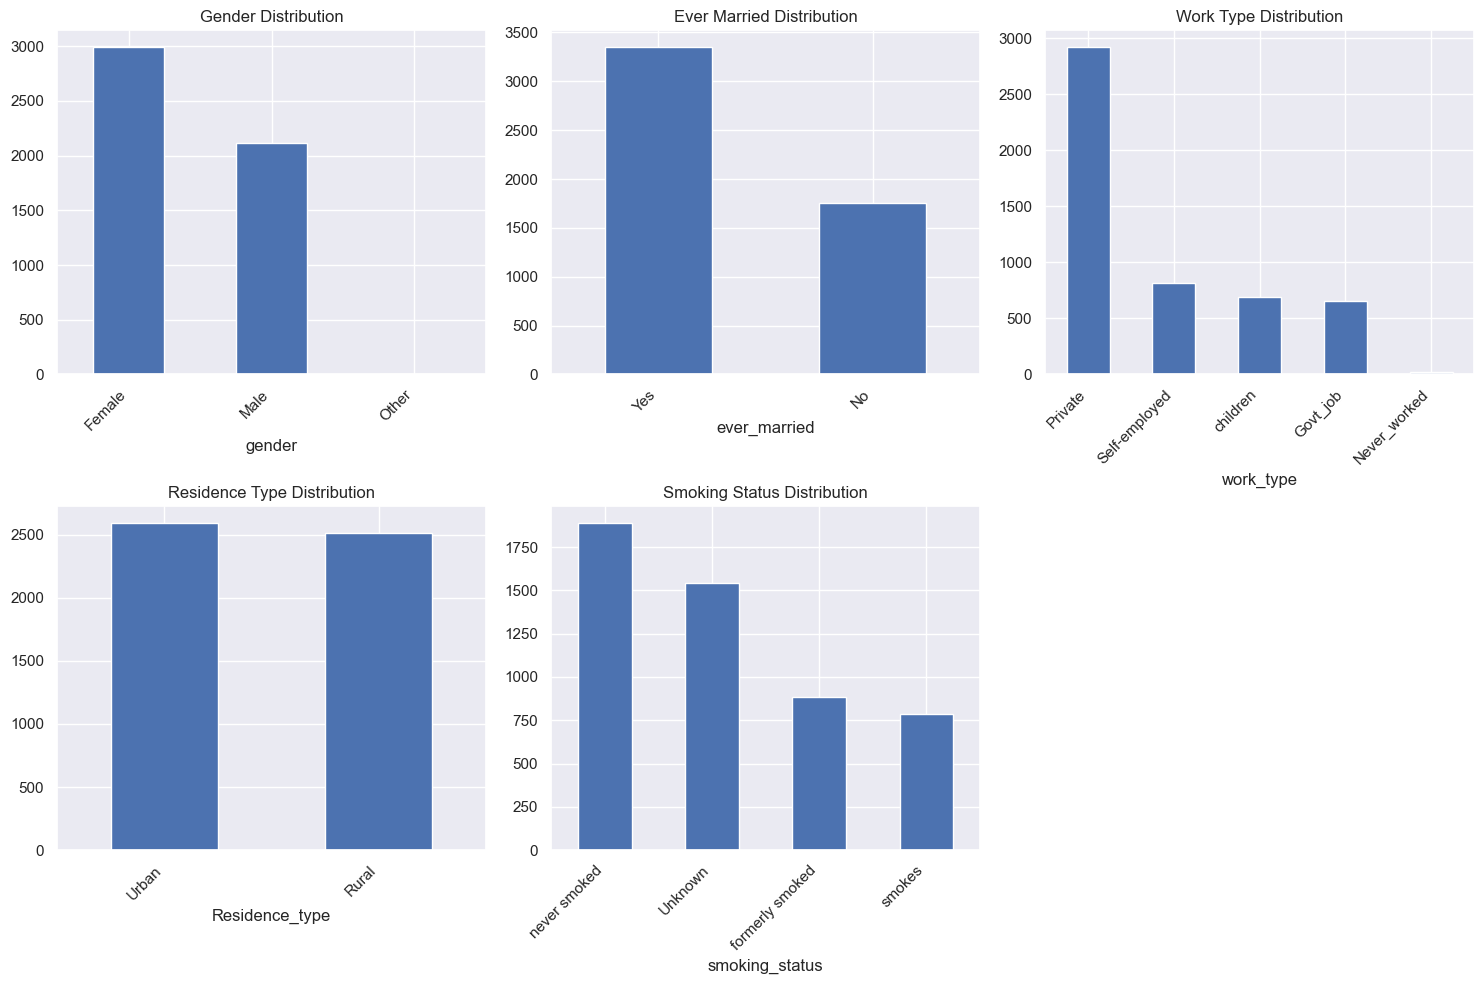

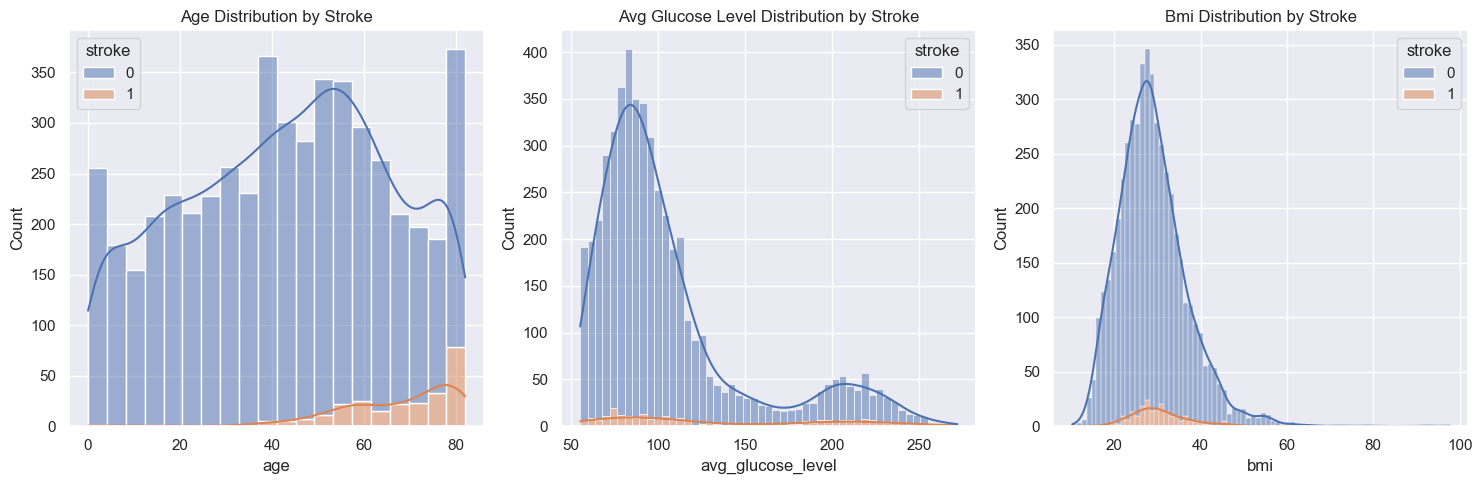

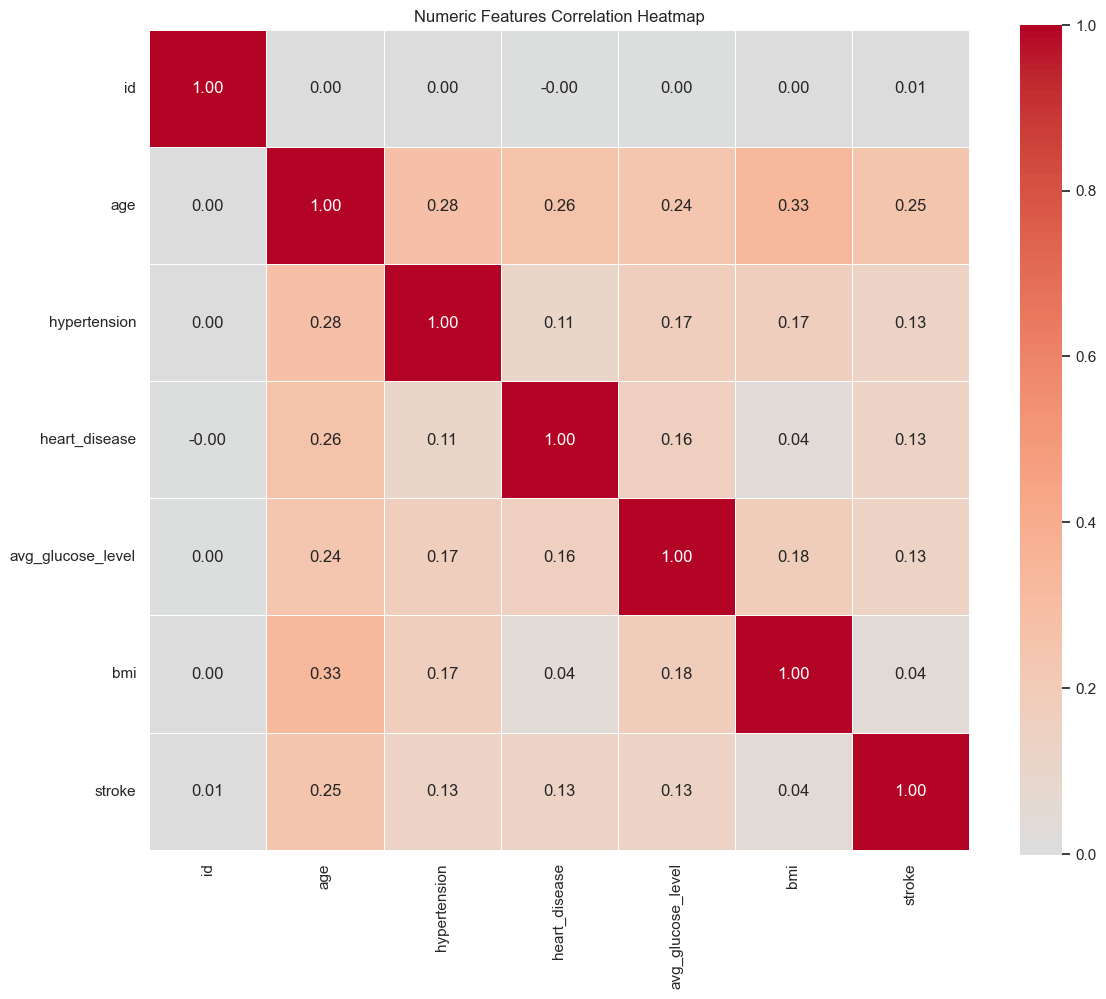

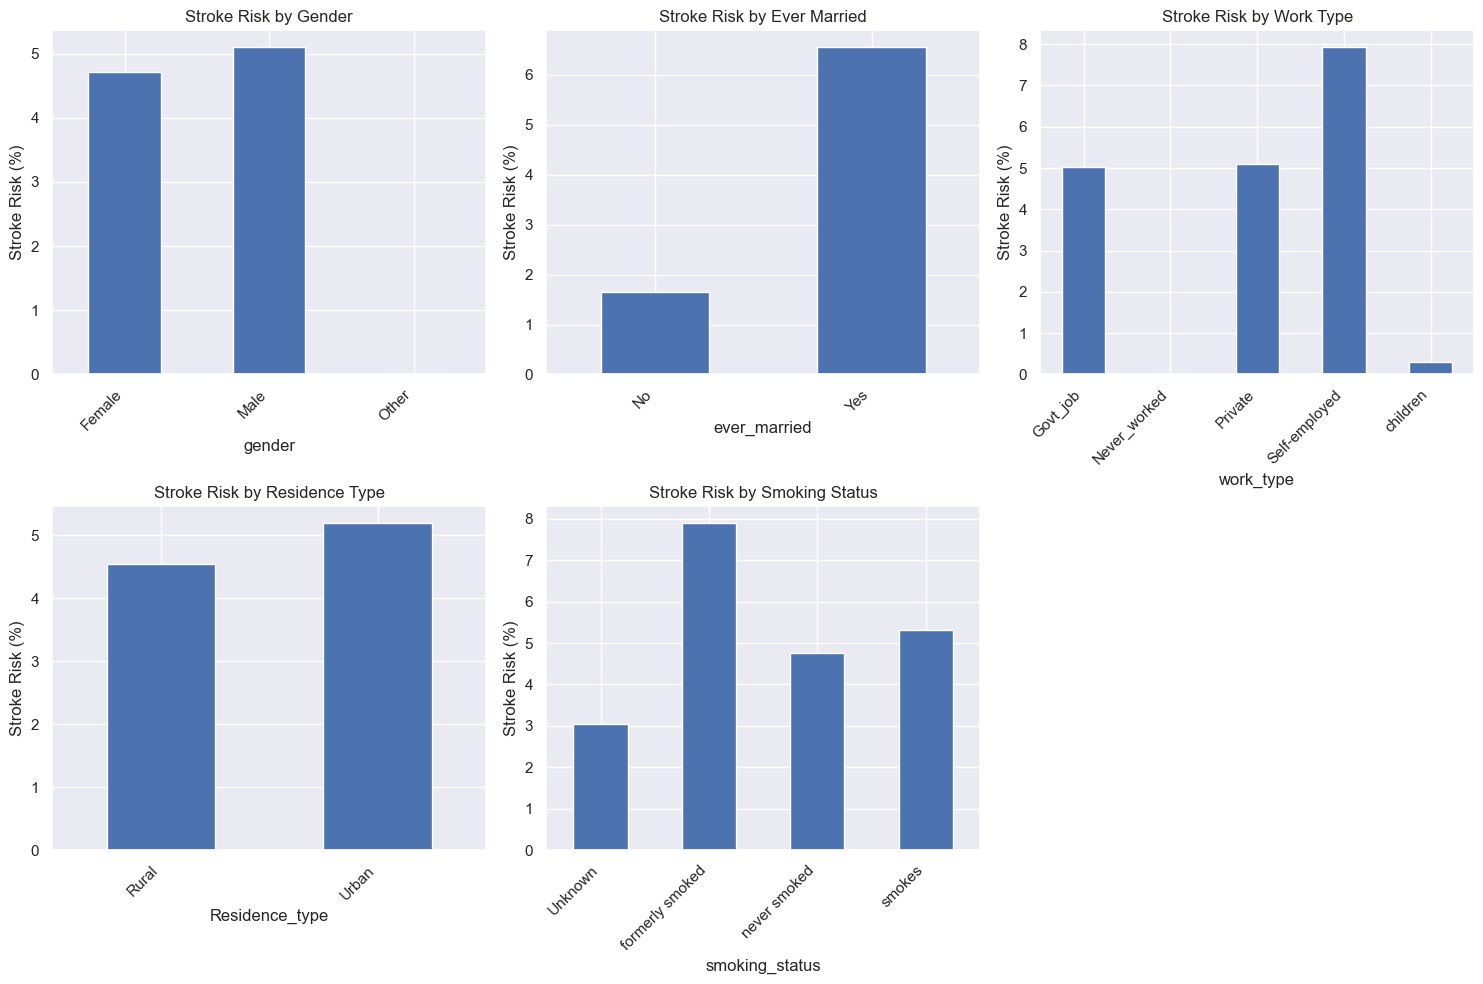

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plotting style and figure size defaults:
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

# Loading the raw dataset for analysis before preprocessing:
df = pd.read_csv("../data/raw/healthcare-dataset-stroke-data.csv")

# 1. Dataset Overview and Data Quality:
def dataset_overview():
    print("1. Dataset Overview")
    print("-" * 50)
    print(f"Total Rows: {df.shape[0]}")
    print(f"Total Columns: {df.shape[1]}")
    print("\nColumn Information:")
    print(df.info())
    
    print("\n2. Missing Values Analysis")
    print("-" * 50)
    missing_values = df.isnull().sum()
    missing_percentages = 100 * df.isnull().sum() / len(df)
    missing_table = pd.concat([missing_values, missing_percentages], axis=1, 
                               keys=['Missing Values', 'Percentage'])
    print(missing_table[missing_table['Missing Values'] > 0])

# 2. Target Variable Distribution:
def target_distribution():
    plt.figure(figsize=(10, 6))
    stroke_counts = df['stroke'].value_counts()
    
    plt.subplot(1, 2, 1)
    df['stroke'].value_counts().plot(kind='bar')
    plt.title('Stroke Target Distribution')
    plt.xlabel('Stroke')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], 
            autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    plt.title('Stroke Occurrence Percentage')
    
    plt.tight_layout()
    plt.show()

# 3. Categorical Feature Analysis:
def categorical_feature_analysis():
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(2, 3, i)
        df[col].value_counts().plot(kind='bar')
        plt.title(f'{col.replace("_", " ").title()} Distribution')
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# 4. Numerical Feature Distribution:
def numerical_feature_distribution():
    numerical_cols = ['age', 'avg_glucose_level', 'bmi']
    
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(1, 3, i)
        sns.histplot(data=df, x=col, hue='stroke', multiple='stack', kde=True)
        plt.title(f'{col.replace("_", " ").title()} Distribution by Stroke')
    
    plt.tight_layout()
    plt.show()

# 5. Advanced Correlation and Feature Importance:
def correlation_analysis():
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                linewidths=0.5, fmt=".2f", square=True, center=0)
    plt.title('Numeric Features Correlation Heatmap')
    plt.tight_layout()
    plt.show()

# 6. Stroke Risk by Categorical Features:
def stroke_risk_by_categories():
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(2, 3, i)
        stroke_risk = df.groupby(col)['stroke'].mean() * 100
        stroke_risk.plot(kind='bar')
        plt.title(f'Stroke Risk by {col.replace("_", " ").title()}')
        plt.ylabel('Stroke Risk (%)')
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Executing the Analysis Functions:
dataset_overview()
target_distribution()
categorical_feature_analysis()
numerical_feature_distribution()
correlation_analysis()
stroke_risk_by_categories()

#Saving the analysis results
df.describe().to_csv('../reports/descriptive_statistics.csv')